In [309]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt 

# Multiple Linear Regression

In [312]:
train = pd.read_csv("X.csv") 
response = pd.read_csv("y.csv")
test = pd.read_csv("test_cleaned.csv")

In [313]:
np.any(np.isnan(response))

False

In [314]:
response.shape

(1458, 1)

In [315]:
train.shape

(1458, 249)

In [316]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
X = train
fit = lm.fit(X, response)
print("Adjusted R squared:",fit.score(X,response),"Intercept: ", fit.intercept_)
#R squared 
betas = fit.coef_
betas.shape

Adjusted R squared: 0.9113932915151921 Intercept:  [-1788551.44942491]


(1, 249)

In [317]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = fit.predict(X)
mean_squared_error(response, y_pred)

559562836.6481177

In [318]:
train["SalePrice"] = response["SalePrice"]

# Using statsmodel

In [319]:
import statsmodels.api as sm
import statsmodels.formula.api as sm
predictors = train.drop(["SalePrice"], axis = 1)
model = sm.OLS(train["SalePrice"],predictors)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     56.62
Date:                Fri, 08 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:26:04   Log-Likelihood:                -16753.
No. Observations:                1458   AIC:                         3.396e+04
Df Residuals:                    1233   BIC:                         3.514e+04
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage            -155.9039   2137.772     -0.073      0.942   -4349.978    4038.170
LotArea                5514.2255    700.611      7.871      0.000    4139.703    6888.748
Street                  4.79e+04   1.79e+04      2.682      0.007    1.29e+04    8.29e+04
Alley                   594.6982   5513.973      0.108      0.914   -1.02e+04    1.14e+04
LotShape               1338.3270   1171.416      1.142      0.253    -959.862    3636.516
LandSlope              6303.3874   5527.160      1.140      0.254   -4540.291    1.71e+04
OverallQual            2.925e+04   5691.907      5.140      0.000    1.81e+04    4.04e+04
OverallCond            2.316e+04   4006.051      5.781      0.000    1.53e+04     3.1e+04
YearBuilt              2.342e+05   1.52e+05      1.537      0.125   -6.47e+04    5.33e+05
YearRemodAdd          -7.766e+04   1.93e+05     -0.402      0.688   -4.56e+05    3.01e+05
MasVnrArea             2029.8998    680.831      2.982      0.003     694.185    3365.615
ExterQual             -2.504e+04   3675.735     -6.813      0.000   -3.23e+04   -1.78e+04
ExterCond             -2234.1359   3345.935     -0.668      0.504   -8798.492    4330.220
BsmtQual              -1.455e+04   2267.132     -6.419      0.000    -1.9e+04   -1.01e+04
BsmtCond               2752.5247   2056.131      1.339      0.181   -1281.379    6786.428
BsmtExposure          -4557.1181   1618.493     -2.816      0.005   -7732.424   -1381.813
BsmtFinType1           1527.0282   1442.747      1.058      0.290   -1303.483    4357.540
BsmtFinSF1             1223.3034    291.790      4.192      0.000     650.843    1795.764
BsmtFinType2          -4273.8195   3244.186     -1.317      0.188   -1.06e+04    2090.916
BsmtFinSF2             -699.5647    441.228     -1.585      0.113   -1565.206     166.077
BsmtUnfSF              -708.0069    405.811     -1.745      0.081   -1504.163      88.149
TotalBsmtSF           -2757.3897   1446.056     -1.907      0.057   -5594.392      79.613
HeatingQC             -1309.7879   1221.201     -1.073      0.284   -3705.650    1086.074
CentralAir            -5318.1977   5953.538     -0.893      0.372    -1.7e+04    6361.988
1stFlrSF               9819.4024   4529.582      2.168      0.030     932.861    1.87e+04
2ndFlrSF               2274.8630    935.948      2.431      0.015     438.636    4111.090
LowQualFinSF            433.1265   1046.427      0.414      0.679   -1619.848    2486.101
GrLivArea             -4865.4839   6757.081     -0.720      0.472   -1.81e+04    8391.165
BsmtFullBath           6163.4519   2905.728      2.121      0.034     462.733    1.19e+04
BsmtHalfBath            692.9404   4640.101      0.149      0.881   -8410.426    9796.307
FullBath               1.338e+04   5427.839      2.466      0.014    2733.975     2.4e+04
HalfBath               

In [320]:
Y_ols_pred=results.predict(predictors)
sum((Y_ols_pred-train["SalePrice"])**2)/len(predictors)

559562836.6481113

### The Adjusted R-sqaured seems high lets check the assumptions before getting to any conclusions 
1. There exists an (at least approximate) linear relationship between Y and X
2. The distribution of residuals has constant variance.(Homoscedasticity)
3. residuals are normally distributed.
4. residuals are independent of one another. For example, residual1 is not affected by residual2.
5. Multicollinearity: Multiple regression assumes that the independent variables are not highly correlated with each other.  This assumption is tested using Variance Inflation Factor (VIF) values.

In [322]:
# There probabily is multicollinearity
import statsmodels.formula.api as sm
corr=np.corrcoef(predictors,rowvar=0)
corr

array([[ 1.        ,  0.63764274, -0.04051886, ...,  0.00790944,
        -0.04790847,  0.09419104],
       [ 0.63764274,  1.        , -0.1229057 , ..., -0.00482927,
        -0.00566648,  0.0434501 ],
       [-0.04051886, -0.1229057 ,  1.        , ...,  0.00758102,
        -0.00195806,  0.01951211],
       ...,
       [ 0.00790944, -0.00482927,  0.00758102, ...,  1.        ,
        -0.25314963, -0.03579707],
       [-0.04790847, -0.00566648, -0.00195806, ..., -0.25314963,
         1.        , -0.65155886],
       [ 0.09419104,  0.0434501 ,  0.01951211, ..., -0.03579707,
        -0.65155886,  1.        ]])

In [324]:
np.any(corr >0.7)
# there probabily is a nan in here so thats what the error comming out
# not going to check since we will try out some different methods
# mlr probbably wont be the best 

/Users/chi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


True

# Plot Residuals

## doesn't seem to violate homoscedasticty
## quite normally distriuted as well

In [325]:
from yellowbrick.regressor import ResidualsPlot

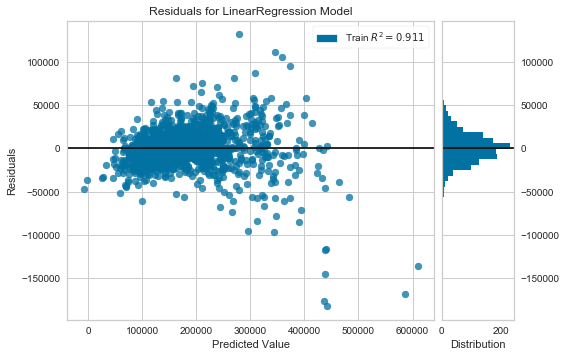

In [326]:
visualizer = ResidualsPlot(lm)
visualizer.fit(predictors, (train["SalePrice"])) 
visualizer.poof()

# Log transform the response variable seems to make the residual distribution even more uniform against the response

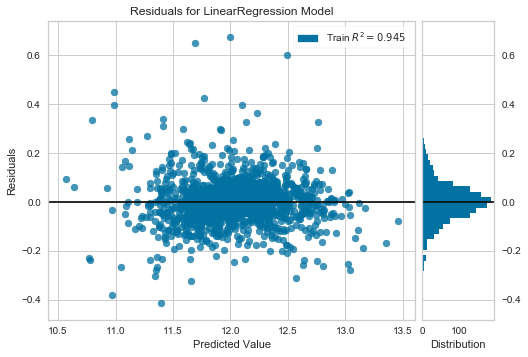

In [327]:
visualizer = ResidualsPlot(lm)
visualizer.fit(predictors, np.log(train["SalePrice"])) 
visualizer.poof()

# Fitting the MLR again with the log response we see that R-Squared increases fro 0.91 to 0.94

In [345]:
fit.score(predictors, np.log(response))

0.9446311744142786

In [347]:
y_pred = fit.predict(predictors)
mean_squared_error(np.log(response), y_pred)

0.00884034377884708

# Manual 5-Fold Cross Validation 

In [348]:
from sklearn.model_selection import KFold 
#lets do a 5 fold CV

kf = KFold(n_splits=5) 
kf.get_n_splits(X)

KFold(n_splits=5, random_state=None, shuffle=False)
index1, index2 ,index3, index4, index5= kf.split(X)
train1, test1 = index1
train2, test2 = index2
train3, test3 = index3
train4, test4 = index4
train5, test5 = index5

X1_train, X1_test = X.iloc[train1,:], X.iloc[test1,:]
X2_train, X2_test = X.iloc[train2,:], X.iloc[test2,:]
X3_train, X3_test = X.iloc[train3,:], X.iloc[test3,:]
X4_train, X4_test = X.iloc[train4,:], X.iloc[test4,:]
X5_train, X5_test = X.iloc[train5,:], X.iloc[test5,:]

trainy1 = X1_train["SalePrice"]
X1_train = X1_train.drop(["SalePrice"], axis = 1)
trainy2 = X2_train["SalePrice"]
X2_train = X2_train.drop(["SalePrice"], axis = 1)
trainy3 = X3_train["SalePrice"]
X3_train = X3_train.drop(["SalePrice"], axis = 1)
trainy4 = X4_train["SalePrice"]
X4_train = X4_train.drop(["SalePrice"], axis = 1)
trainy5 = X5_train["SalePrice"]
X5_train = X5_train.drop(["SalePrice"], axis = 1)


testy1 = X1_test["SalePrice"]
X1_test = X1_test.drop(["SalePrice"], axis = 1)
testy2 = X2_test["SalePrice"]
X2_test = X2_test.drop(["SalePrice"], axis = 1)
testy3 = X3_test["SalePrice"]
X3_test = X3_test.drop(["SalePrice"], axis = 1)
testy4 = X4_test["SalePrice"]
X4_test = X4_test.drop(["SalePrice"], axis = 1)
testy5 = X5_test["SalePrice"]
X5_test = X5_test.drop(["SalePrice"], axis = 1)

In [349]:
from sklearn.metrics import mean_squared_error, r2_score
lm = linear_model.LinearRegression()
fit1 = lm.fit(X1_train, np.log(trainy1))
fit2 = lm.fit(X2_train, np.log(trainy2))
fit3 = lm.fit(X3_train, np.log(trainy3))
fit4 = lm.fit(X4_train, np.log(trainy4))
fit5 = lm.fit(X5_train, np.log(trainy5))

y_pred1 = fit1.predict(X1_test)
y_pred2 = fit2.predict(X2_test)
y_pred3 = fit3.predict(X3_test)
y_pred4 = fit4.predict(X4_test)
y_pred5 = fit5.predict(X5_test)

In [350]:
sum5fold_mse = (mean_squared_error(np.log(testy1), y_pred1)+mean_squared_error(np.log(testy2), y_pred2)+ mean_squared_error(np.log(testy3), y_pred3)+mean_squared_error(np.log(testy4), y_pred4)+mean_squared_error(np.log(testy5), y_pred5))
mean_mse = sum5fold_mse/5
mean_mse

0.009611781900121144

In [352]:
mean_mse-0.00884034377884708

0.0007714381212740647

# we are overfitting as usual